# <center> <u> Network Theory 2024 Projektityö </u> </center>

## <center> Bianconi-Barabasi malli</center>

In [1]:
# paketit

import networkx as nx
import multiprocess as mltp
import matplotlib.pyplot as plt
import numpy as np # numpy importataan myös osana alla olevaa bbModelWrap moduulia, mutta tekstieditoreiden koodi analyysit eivät tätä huomaa
from collections import Counter
from BianconiBarabasiModel import bbModelWrap as BB

### Laatu jakaumat
Testataan ensin, että generoidut laadut seuraavat haluttuja jakaumia. Simuloidaan kymmenen verkostoa molemmilla tyypeillä, 'uniform' ja 'BEC', jotta simulaation (pseudo)satunnaisten lukujen generaattori saa monta eri 'seediä' ja varmistamme, että tulokset eivät johdu vain yhdestä onnekkaasta simulaatiosta. Tasaisella jakaumalla muodostamme histogrammin suoraan laaduista ja Bose-Einstein kondensaatti jakauman tapauksessa laskemme laadusta solmun energian ja piirrämme histogrammin niistä. Yhden verkoston koko on 100 000 solmua ja jokainen uusi solmu luo kaksi uutta suoraa.

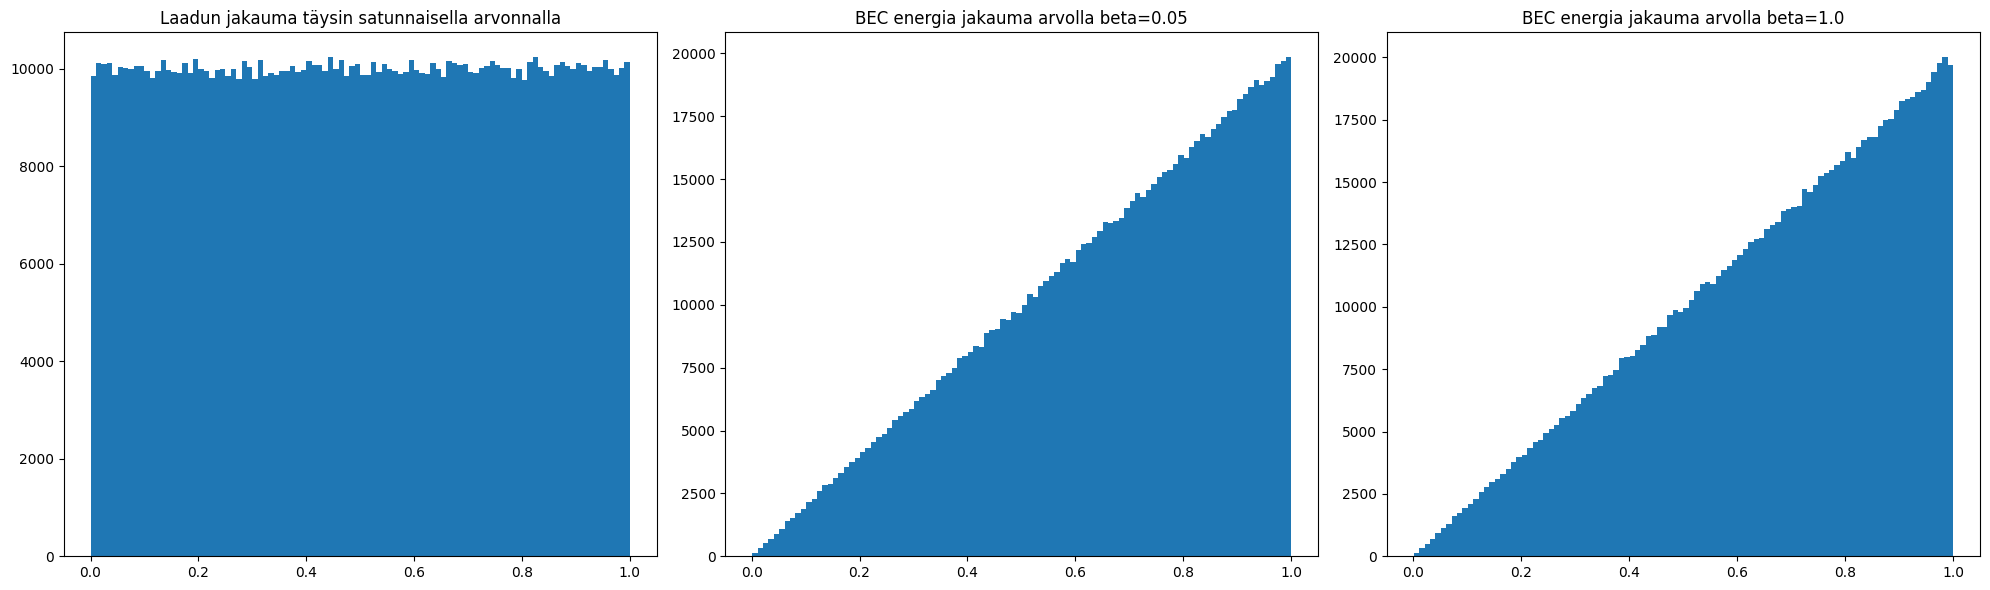

In [2]:
# testataan omaa funktiota ja nähdään kosahtaako kaikki
test_cases = [(1, "uniform"), (0.05, "BEC"), (1.0, "BEC")]

fig, axes = plt.subplots(1, 3, figsize=(20,6))
plot_index = 0
for case in test_cases:
    test_results = []
    for i in range(10):
        test_dict, test_edge = BB.generateBianconiBarabasi(100000, 2, case[0], case[1])
        test_fitns = list(test_dict.values())
        if (case[1] == "BEC"):
            test_results.extend([-np.log(val) / case[0] for val in test_fitns])
        else:
            test_results.extend(test_fitns)

    test_results = np.array(test_results)
    # hist, bins = np.histogram(test_results, np.arange(0.0, 1.0, 0.05))
    # hist = hist / 10
    
    if (case[1] != "uniform"):
        axes[plot_index].hist(test_results, bins=100)
        axes[plot_index].title.set_text(f"{case[1]} energia jakauma arvolla beta={case[0]}")
        # axes[plot_index].set_xlim(0,1)
    else:
        axes[plot_index].hist(test_results, bins=100)
        axes[plot_index].title.set_text(f"Laadun jakauma täysin satunnaisella arvonnalla")
        # axes[plot_index].set_xlim(0,1)
    plot_index += 1
plt.tight_layout()
plt.show()

Näyttää oikealta!

### Solmujen asteet
Seuraavaksi haluamme tutkia minkälaisen astejakauman simulaatio tuottaa. Valitsemme parametreiksi sellaiset joita on käytetty Bianconin ja Barabásin artikkeleissa "Competition and multiscaling in evolving networks" ja "Bose-Einstein Condensation in Complex Networks". Testataan ensin tasaisen satunnaista laatu verkostoa.

Simuloimme kolme iteraatiota täyssatunnaisesta verkostosta miljoonalla solmulla ja uudet solmut lisäävät taas kaksi uutta suoraa. Enemmän iteraatioit ja niiden keskiarvon ottaminen olisi parempi vaihtoehto, mutta sitä ei yksinkertaisesti pysty NetworkX:llä tekemään järkevässä suoritusajassa. Mahdollisesti jokin toinen Python kirjasto olisi parempi vaihtoehto tähän.

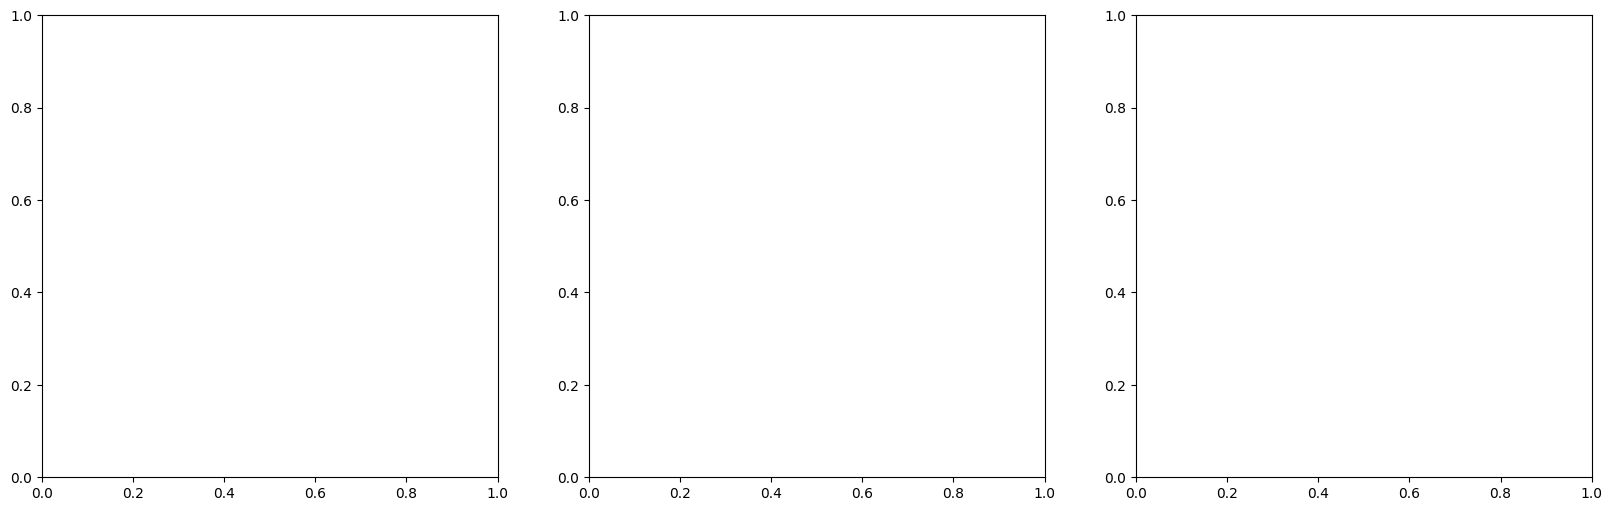

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
plot_index = 0